In [49]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
r = requests.get("http://www.nuforc.org/webreports/ndxevent.html")
soup = BeautifulSoup(r.content)
# soup = BeautifulSoup(open(""))

In [10]:
print(soup.prettify()[0: 200])

<html>
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
  <html>
   <head>
    <meta content="text/html; c


In [18]:
for td in soup.find_all("font"):
	print(td.contents)

Center</font>]
['National UFO Reporting\rCenter']
[<font size="+1">Report Index by Month</font>]
['Report Index by Month']
['Reports']
['Count']
[<a href="ndxe202111.html">11/2021</a>]
['62']
[<a href="ndxe202110.html">10/2021</a>]
['223']
[<a href="ndxe202109.html">09/2021</a>]
['230']
[<a href="ndxe202108.html">08/2021</a>]
['239']
[<a href="ndxe202107.html">07/2021</a>]
['179']
[<a href="ndxe202106.html">06/2021</a>]
['200']
[<a href="ndxe202105.html">05/2021</a>]
['459']
[<a href="ndxe202104.html">04/2021</a>]
['275']
[<a href="ndxe202103.html">03/2021</a>]
['244']
[<a href="ndxe202102.html">02/2021</a>]
['243']
[<a href="ndxe202101.html">01/2021</a>]
['291']
[<a href="ndxe202012.html">12/2020</a>]
['373']
[<a href="ndxe202011.html">11/2020</a>]
['449']
[<a href="ndxe202010.html">10/2020</a>]
['532']
[<a href="ndxe202009.html">09/2020</a>]
['456']
[<a href="ndxe202008.html">08/2020</a>]
['716']
[<a href="ndxe202007.html">07/2020</a>]
['653']
[<a href="ndxe202006.html">06/2020</a>]


In [71]:
table = soup.find_all("font")[6:-2]
table[0].get_text(), table[0].find("a").attrs['href'], table[1].get_text()
# three key elements

('11/2021', 'ndxe202111.html', '62')

In [72]:
data = []
url_prefix = "http://www.nuforc.org/webreports/"

for key in range(len(table)):
	if key % 2 == 0:
		data.append([table[key].get_text(), url_prefix + table[key].find("a").attrs['href'], table[key + 1].get_text()])

data


[['11/2021', 'http://www.nuforc.org/webreports/ndxe202111.html', '62'],
 ['10/2021', 'http://www.nuforc.org/webreports/ndxe202110.html', '223'],
 ['09/2021', 'http://www.nuforc.org/webreports/ndxe202109.html', '230'],
 ['08/2021', 'http://www.nuforc.org/webreports/ndxe202108.html', '239'],
 ['07/2021', 'http://www.nuforc.org/webreports/ndxe202107.html', '179'],
 ['06/2021', 'http://www.nuforc.org/webreports/ndxe202106.html', '200'],
 ['05/2021', 'http://www.nuforc.org/webreports/ndxe202105.html', '459'],
 ['04/2021', 'http://www.nuforc.org/webreports/ndxe202104.html', '275'],
 ['03/2021', 'http://www.nuforc.org/webreports/ndxe202103.html', '244'],
 ['02/2021', 'http://www.nuforc.org/webreports/ndxe202102.html', '243'],
 ['01/2021', 'http://www.nuforc.org/webreports/ndxe202101.html', '291'],
 ['12/2020', 'http://www.nuforc.org/webreports/ndxe202012.html', '373'],
 ['11/2020', 'http://www.nuforc.org/webreports/ndxe202011.html', '449'],
 ['10/2020', 'http://www.nuforc.org/webreports/ndxe2

In [73]:
# in pandas
df = pd.DataFrame(data, columns=["month", "url", "occurance"])
df

,month,url,occurance
0,11/2021,http://www.nuforc.org/webreports/ndxe202111.html,62
1,10/2021,http://www.nuforc.org/webreports/ndxe202110.html,223
2,09/2021,http://www.nuforc.org/webreports/ndxe202109.html,230
3,08/2021,http://www.nuforc.org/webreports/ndxe202108.html,239
4,07/2021,http://www.nuforc.org/webreports/ndxe202107.html,179
...,...,...,...
957,09/1639,http://www.nuforc.org/webreports/ndxe163909.html,1
958,04/1561,http://www.nuforc.org/webreports/ndxe156104.html,2
959,06/1400,http://www.nuforc.org/webreports/ndxe140006.html,1
960,11/0821,http://www.nuforc.org/webreports/ndxe082111.html,1


In [74]:
df.describe()

,month,url,occurance
count,962,962,962
unique,962,962,326
top,07/1974,http://www.nuforc.org/webreports/ndxe197602.html,1
freq,1,1,103


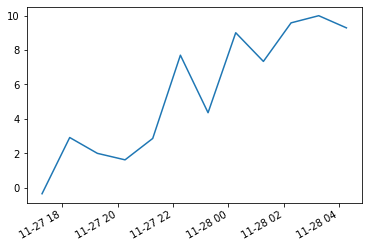

In [48]:

# import random
# import matplotlib.pyplot as plt

# # make up some data
# x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]
# y = [i+random.gauss(0,1) for i,_ in enumerate(x)]

# # plot
# plt.plot(x,y)
# # beautify the x-labels
# plt.gcf().autofmt_xdate()

# plt.show()

In [75]:
df

,month,url,occurance
0,11/2021,http://www.nuforc.org/webreports/ndxe202111.html,62
1,10/2021,http://www.nuforc.org/webreports/ndxe202110.html,223
2,09/2021,http://www.nuforc.org/webreports/ndxe202109.html,230
3,08/2021,http://www.nuforc.org/webreports/ndxe202108.html,239
4,07/2021,http://www.nuforc.org/webreports/ndxe202107.html,179
...,...,...,...
957,09/1639,http://www.nuforc.org/webreports/ndxe163909.html,1
958,04/1561,http://www.nuforc.org/webreports/ndxe156104.html,2
959,06/1400,http://www.nuforc.org/webreports/ndxe140006.html,1
960,11/0821,http://www.nuforc.org/webreports/ndxe082111.html,1


In [76]:
# datetime("11/2021")
def parse_time(time):
	# time = "11/2021"
	parts = time.split("/")
	parts
	return datetime(year=int(parts[1]), month=int(parts[0]), day=15)

In [86]:
df["date"] = df['month'].map(parse_time)
df = df[df['date'] > datetime(1900, 1, 1)]

<BarContainer object of 940 artists>

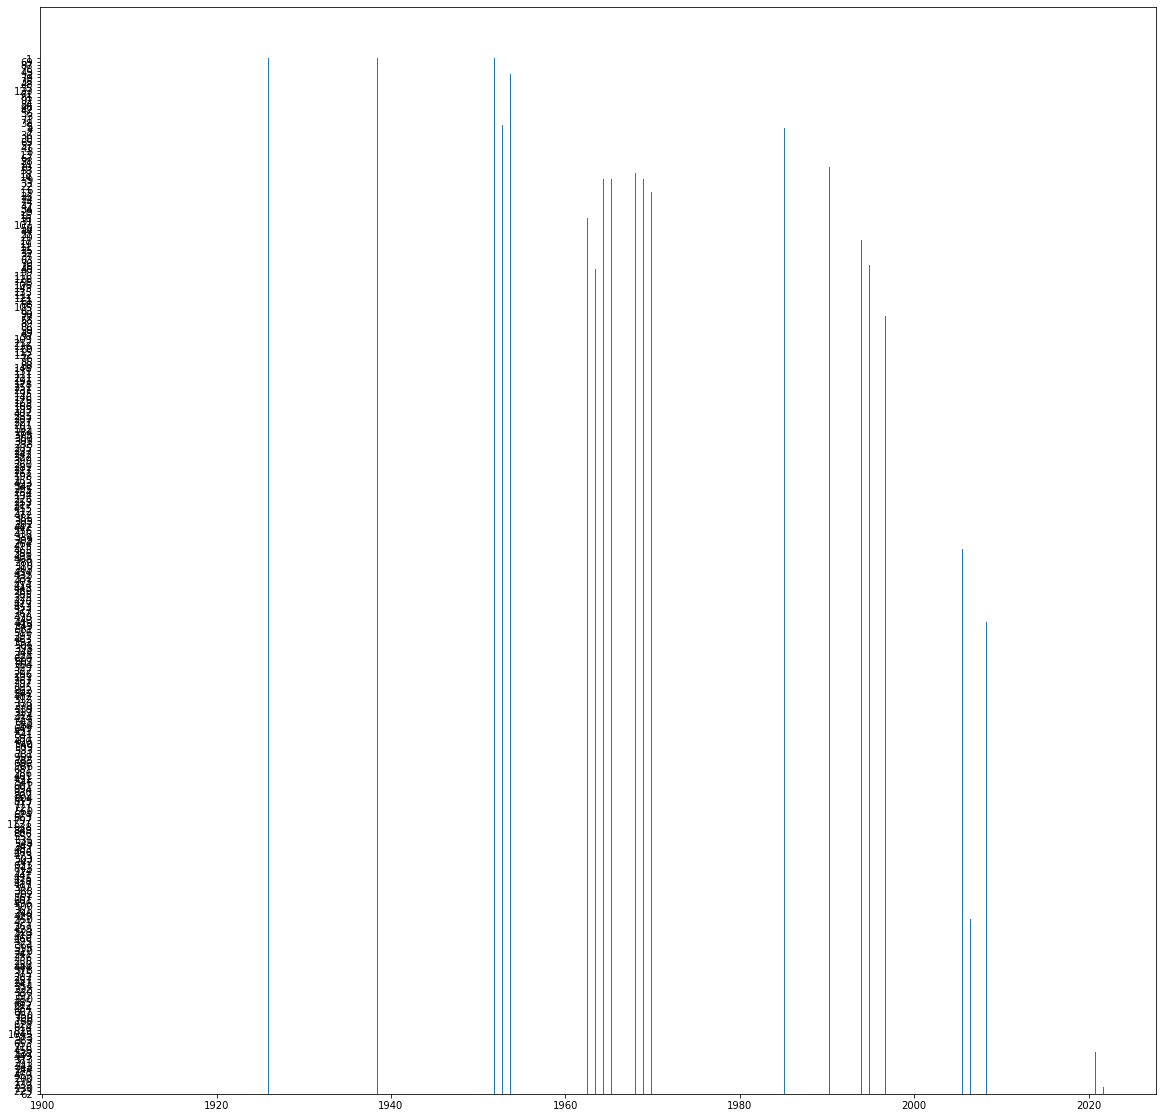

In [90]:
# plot
X = df["date"]
Y = df["occurance"]

fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(X, Y)

this is too noisy, try group by year.

In [91]:
df

,month,url,occurance,date
0,11/2021,http://www.nuforc.org/webreports/ndxe202111.html,62,2021-11-15 00:00:00
1,10/2021,http://www.nuforc.org/webreports/ndxe202110.html,223,2021-10-15 00:00:00
2,09/2021,http://www.nuforc.org/webreports/ndxe202109.html,230,2021-09-15 00:00:00
3,08/2021,http://www.nuforc.org/webreports/ndxe202108.html,239,2021-08-15 00:00:00
4,07/2021,http://www.nuforc.org/webreports/ndxe202107.html,179,2021-07-15 00:00:00
...,...,...,...,...
935,05/1910,http://www.nuforc.org/webreports/ndxe191005.html,1,1910-05-15 00:00:00
936,01/1910,http://www.nuforc.org/webreports/ndxe191001.html,1,1910-01-15 00:00:00
937,06/1907,http://www.nuforc.org/webreports/ndxe190706.html,1,1907-06-15 00:00:00
938,11/1906,http://www.nuforc.org/webreports/ndxe190611.html,1,1906-11-15 00:00:00


In [93]:
df[["date", "occurance"]]

,date,occurance
0,2021-11-15 00:00:00,62
1,2021-10-15 00:00:00,223
2,2021-09-15 00:00:00,230
3,2021-08-15 00:00:00,239
4,2021-07-15 00:00:00,179
...,...,...
935,1910-05-15 00:00:00,1
936,1910-01-15 00:00:00,1
937,1907-06-15 00:00:00,1
938,1906-11-15 00:00:00,1


In [124]:
df['year'] = df['date'].map(lambda x: x.year)
years = df[['year', 'occurance']]
years['occurance'] = years['occurance'].map(lambda x: int(x))
years.groupby('year', as_index=False).sum()

/var/folders/zq/gn09x0d53r74hd7z0lp249cr0000gp/T/ipykernel_26205/4128533562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].map(lambda x: x.year)
/var/folders/zq/gn09x0d53r74hd7z0lp249cr0000gp/T/ipykernel_26205/4128533562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years['occurance'] = years['occurance'].map(lambda x: int(x))


,year,occurance
0,1905,12
1,1906,1
2,1907,1
3,1910,3
4,1914,2
...,...,...
100,2017,5111
101,2018,3478
102,2019,6311
103,2020,7251


<BarContainer object of 940 artists>

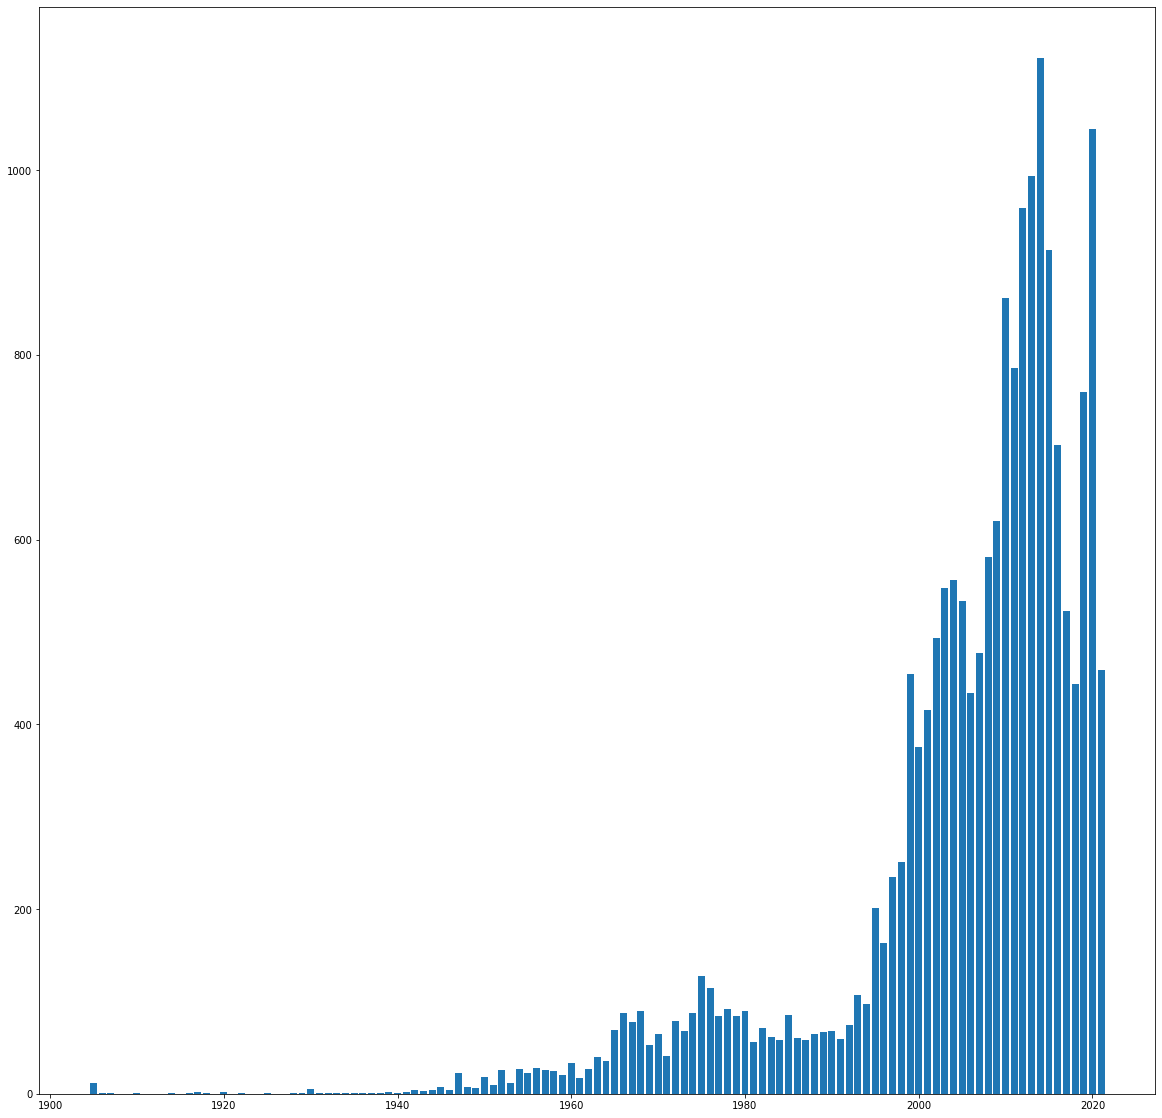

In [131]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years['year'], years['occurance'])